In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.axes as ax

In [54]:
data = pd.read_csv('data_for_lr.csv')

In [55]:
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [56]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [57]:
data.isnull()

,x,y
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
695,False,False
696,False,False
697,False,False
698,False,False


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


# Data Preprocessing

In [59]:
data.shape

(700, 2)

In [60]:
data.dropna(inplace=True)

In [61]:
data.shape

(699, 2)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


# Spliting data

In [63]:
# training input and output
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

# Validate data input and output
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.y[500:700]).reshape(199,1)

In [64]:
print(f"training input data shape = {train_input.shape}")
print(f"training output data shape = {train_output.shape}")
print(f"test inputdata shape = {test_input.shape}")
print(f"test output data shape = {test_output.shape}")

training input data shape = (500, 1)
training output data shape = (500, 1)
test inputdata shape = (199, 1)
test output data shape = (199, 1)


# <font color = 'green'>Linear Regression</font>

## Forward propagation

f(x) = m*x + c

In [65]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

# Cost Function

summation(1/2n*(y-f(x))^2)

In [66]:
def cost_function(predictions,train_output):
    cost = np.mean((predictions - train_output)**2) * 0.5
    return cost

# Gradient Descent for Backpropagation

- df = f(x) - y
- dm = df*x
- dc = df*1

d(cost)/dm = d(cost)/df * df/dm

In [67]:
def backward_propagation(train_input,train_output,predictions):
    derivatives = dict()
    df = (predictions - train_output)
    dm = np.mean(np.multiply(df,train_input))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

# Update Parameters
- m = m - learning_Rate*dm

- c = c - learning_rate*dc

In [68]:
def update_parameters(parameters,derivatives,learning_rate):
    parameters['m'] = parameters['m'] - learning_rate*derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate*derivatives['dc']
    return parameters

# Model Training

sequence of steps
- Forward Propagation
- Cost Function
- Backward Propagation
- Update Parameters

In [69]:
def training(train_input,train_output,learning_rate,iters):
    # random parameters
    parameters = dict()
    parameters['m'] = np.random.uniform(0,1)
    parameters['c'] = np.random.uniform(0,1)
                                       
    plt.figure()
    # loss 
    loss = list()

    # iteration 
    for i in range(iters):
        # forward propagation
        predictions = forward_propagation(train_input,parameters)
        # cost
        cost = cost_functtion(predictions,train_output)
        # append loss and print
        loss.append(cost)
        print(f'Iteration = {i+1}, Loss = {cost}')

        # plot
        fig,ax = plt.subplots()

        ax.plot(train_input,train_output,"+",label='Original')
        ax.plot(train_input,predictions,"*",label='Training')
        
        legend = ax.legend()
        plt.plot(train_input,train_output,"+",label='Original')
        plt.plot(train_input,train_output,"+",label='Original')
        plt.show()

        # backprogation
        derivatives = backward_propagation(train_input,train_output,predictions)
        
        # Updates the parameters
        parameters = update_parameters(parameters,derivatives,learning_rate)

    return parameters,loss

Iteration = 1, Loss = 92.58450142565998


<Figure size 640x480 with 0 Axes>

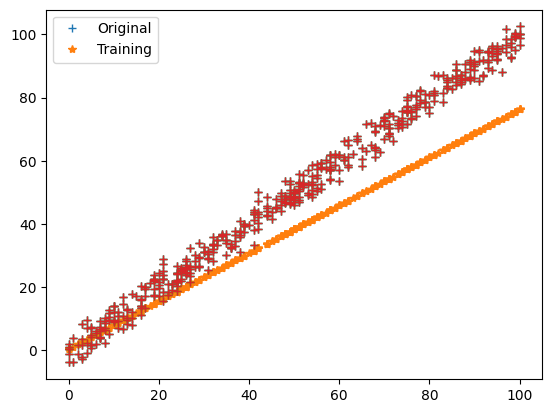

Iteration = 2, Loss = 44.16845869128442


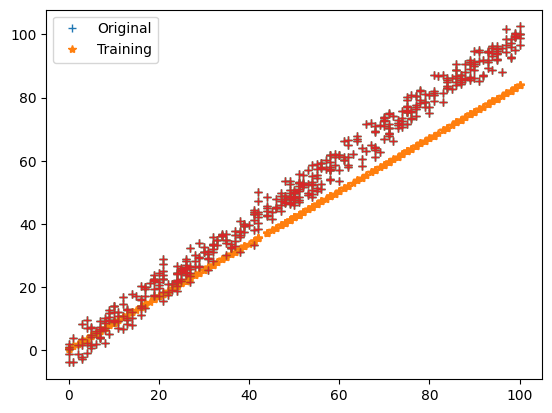

Iteration = 3, Loss = 22.20204513806818


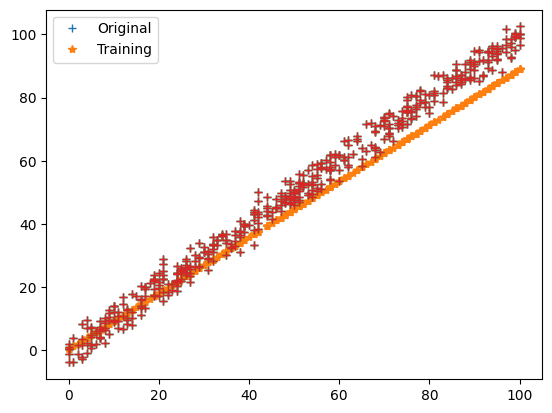

Iteration = 4, Loss = 12.235857641110643


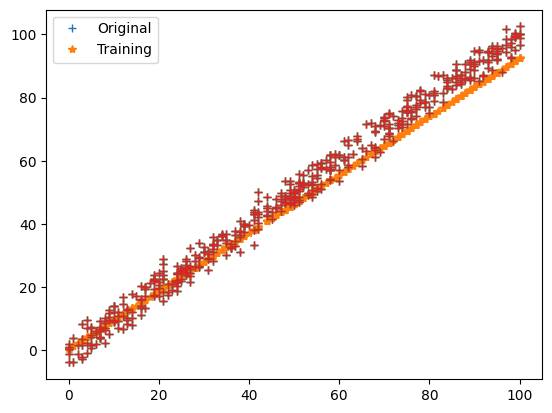

Iteration = 5, Loss = 7.714185997889989


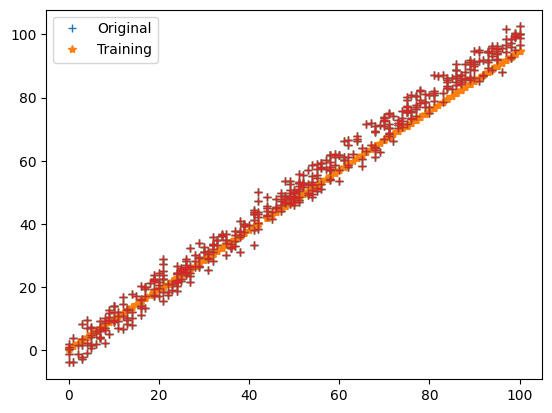

Iteration = 6, Loss = 5.662697228147248


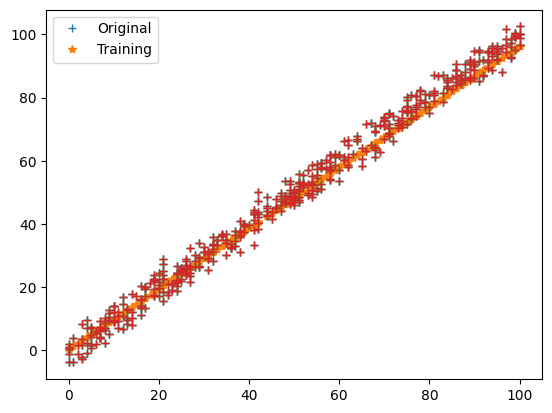

Iteration = 7, Loss = 4.731933164245161


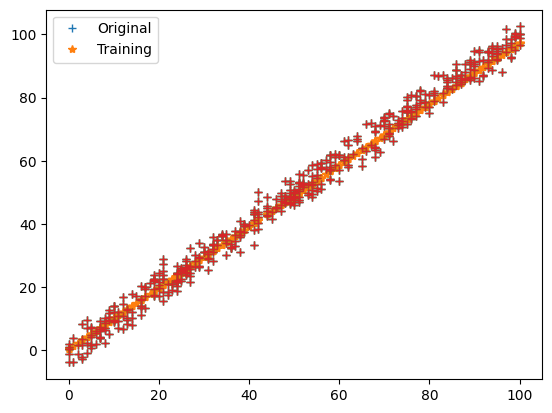

Iteration = 8, Loss = 4.309643140811171


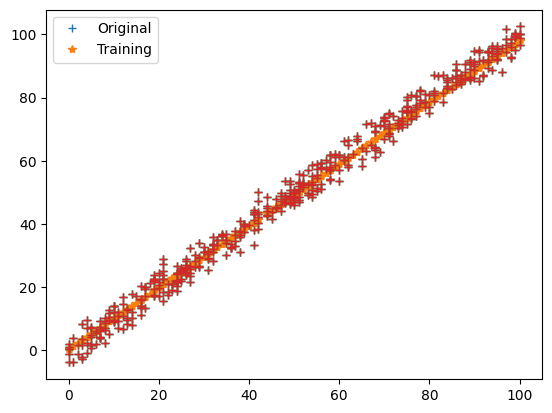

Iteration = 9, Loss = 4.1180483528117


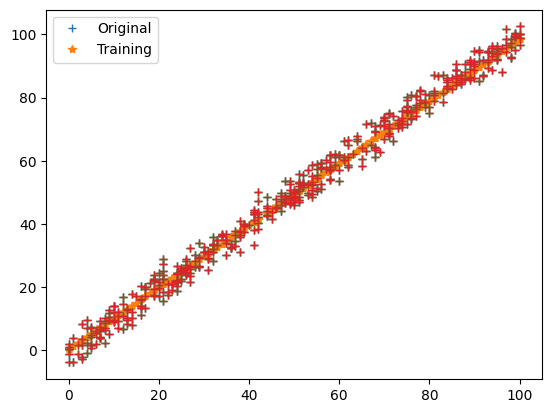

Iteration = 10, Loss = 4.031120248723747


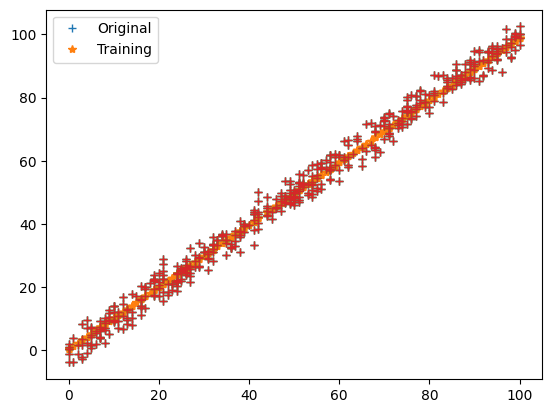

Iteration = 11, Loss = 3.9916795351269108


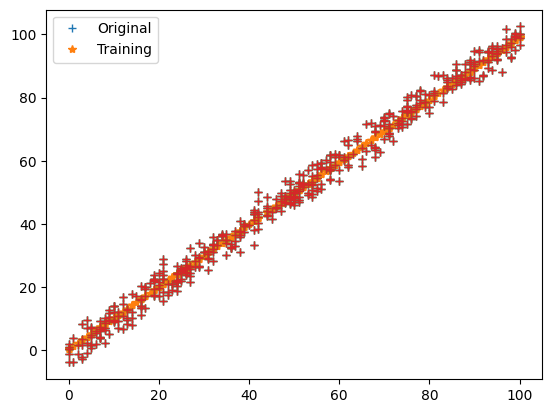

Iteration = 12, Loss = 3.973783903262209


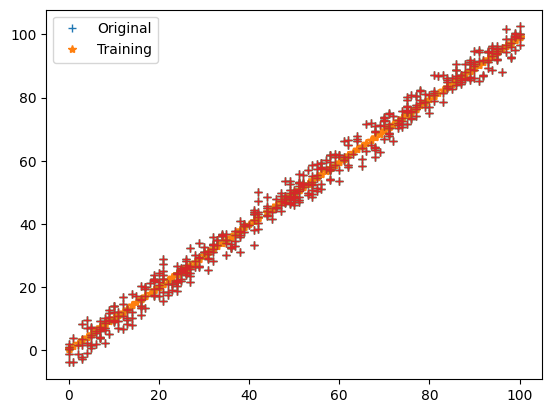

Iteration = 13, Loss = 3.9656632989109184


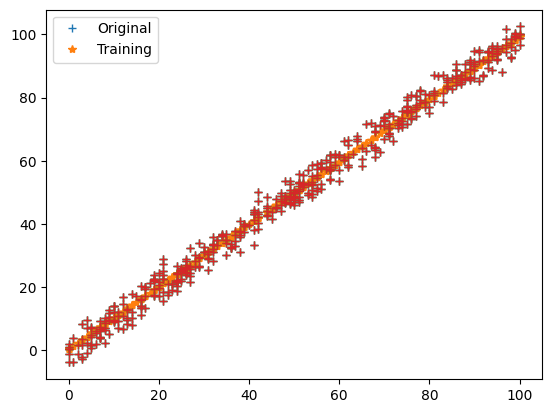

Iteration = 14, Loss = 3.9619776354369995


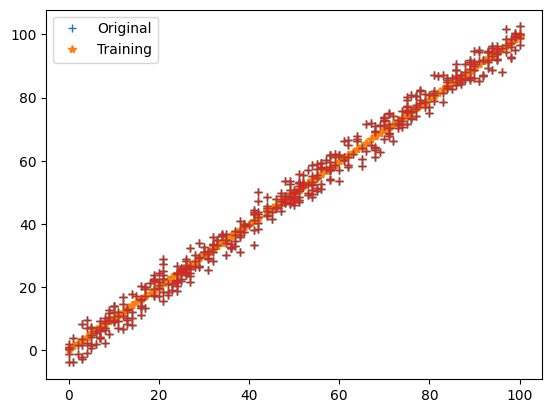

Iteration = 15, Loss = 3.9603041096187828


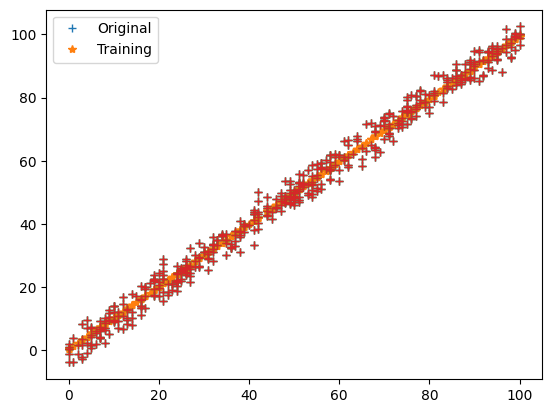

Iteration = 16, Loss = 3.9595434929509934


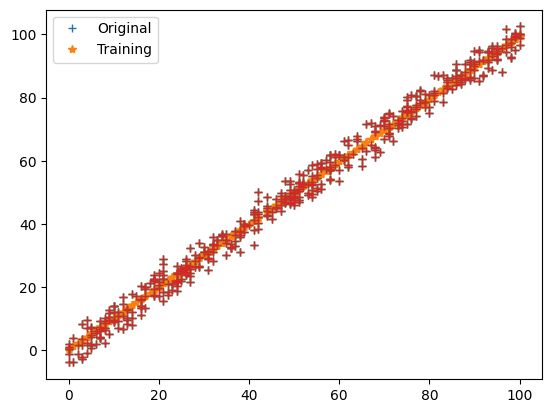

Iteration = 17, Loss = 3.959197064243235


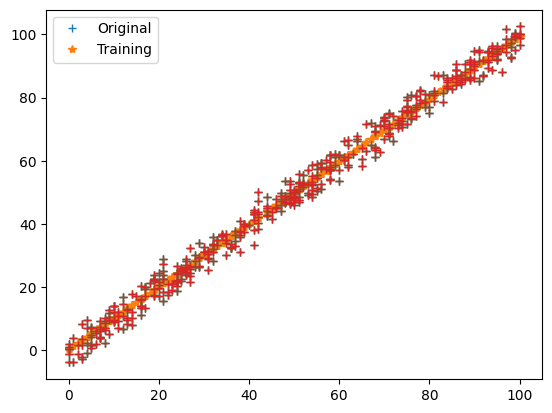

Iteration = 18, Loss = 3.9590385531390164


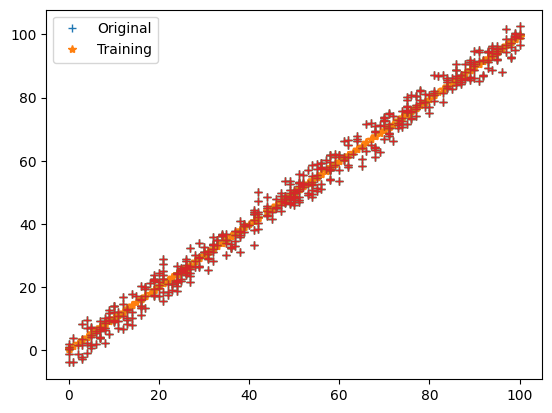

Iteration = 19, Loss = 3.958965300526971


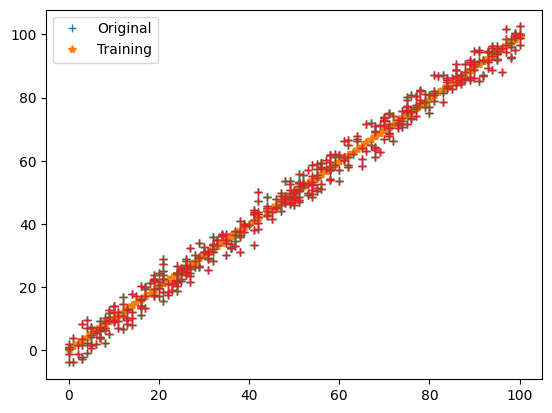

Iteration = 20, Loss = 3.9589307298545546


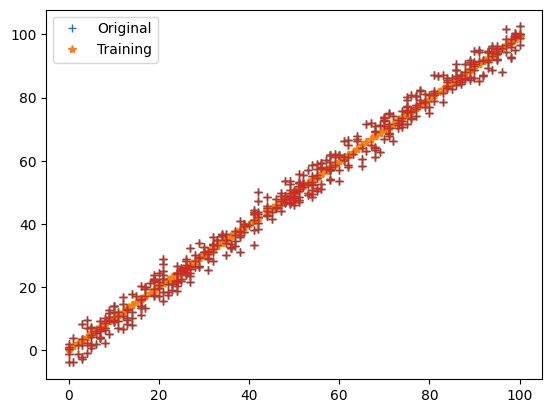

In [70]:
parameter,loss = training(train_input,train_output,0.0001,20)

In [71]:
print(parameter)

{'m': np.float64(0.9915138931288641), 'c': np.float64(0.38473720932073113)}


In [72]:
print(loss)

[np.float64(92.58450142565998), np.float64(44.16845869128442), np.float64(22.20204513806818), np.float64(12.235857641110643), np.float64(7.714185997889989), np.float64(5.662697228147248), np.float64(4.731933164245161), np.float64(4.309643140811171), np.float64(4.1180483528117), np.float64(4.031120248723747), np.float64(3.9916795351269108), np.float64(3.973783903262209), np.float64(3.9656632989109184), np.float64(3.9619776354369995), np.float64(3.9603041096187828), np.float64(3.9595434929509934), np.float64(3.959197064243235), np.float64(3.9590385531390164), np.float64(3.958965300526971), np.float64(3.9589307298545546)]


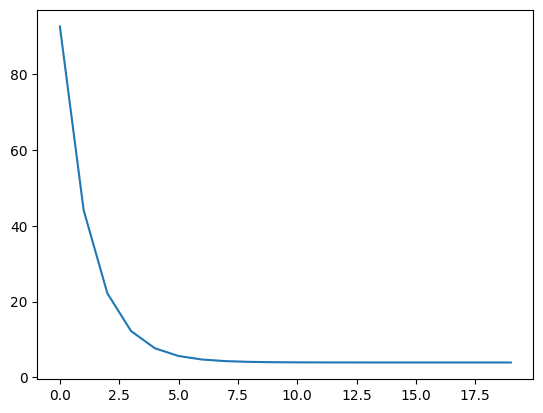

In [73]:
plt.plot(loss)

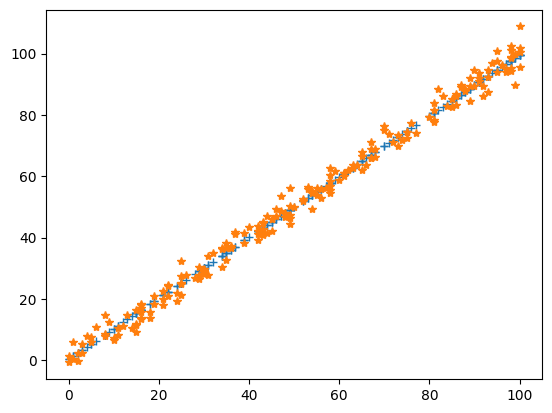

In [74]:
test_predictions = parameter['m']*test_input + parameter['c']
plt.plot(test_input,test_predictions,'+')
plt.plot(test_input,test_output,'*')

# Cost of Prediction

In [77]:
cost_function(test_output,test_predictions)

np.float64(3.995984247107484)